### Problem 1
**(a) Use datasets.make_moons in sklearn package to generate a dataset with 200 samples with random noise. Visualize positive and negative instances with different colors. Split the dataset into training set and test set by 7:3**

In [1]:
# imports
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Create dataset
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

In [3]:
X.shape

(200, 2)

In [4]:
# Split dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

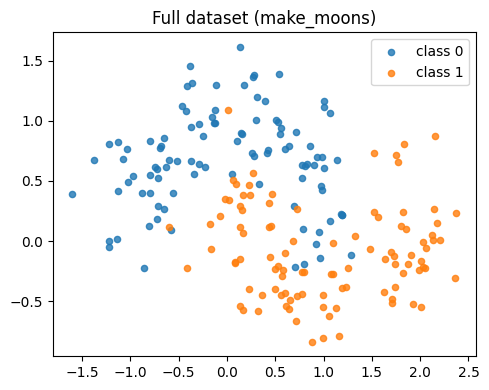

In [5]:
# Visualize dataset
plt.figure(figsize=(5,4))
plt.scatter(X[y==0,0], X[y==0,1], s=20, label="class 0", alpha=0.8)
plt.scatter(X[y==1,0], X[y==1,1], s=20, label="class 1", alpha=0.8)
plt.title("Full dataset (make_moons)")
plt.legend()
plt.tight_layout()
plt.show()

**(b) Use SVM model in sklearn to fit the training data with “RBF” kernel. Try parameter C with different values, i.e. [0.05, 0.1, 1, 2, 5, 10, 50, 100]. Visualize the decision boundary and support vectors along with the plot in part (a). What effects does parameter C have on the model?**

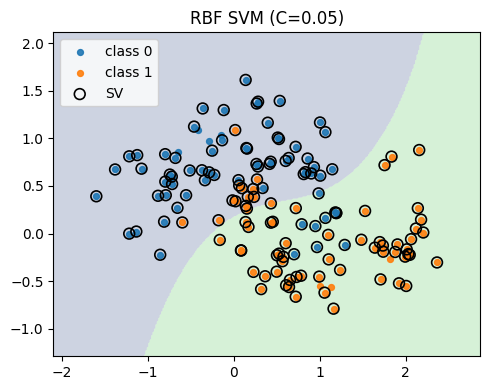

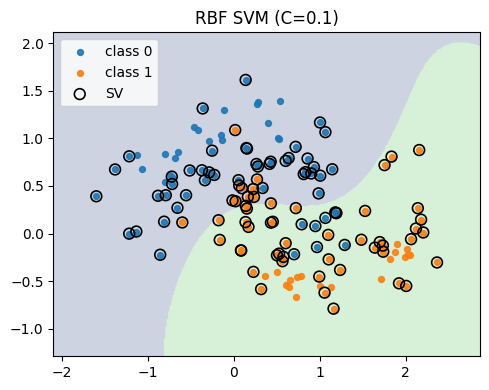

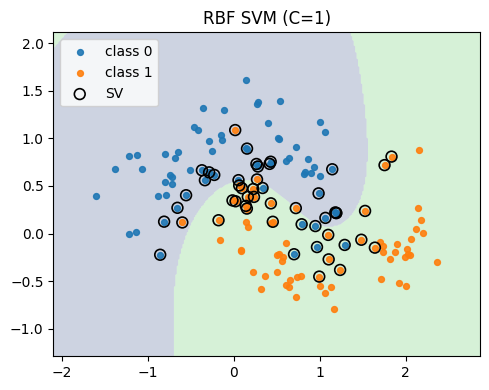

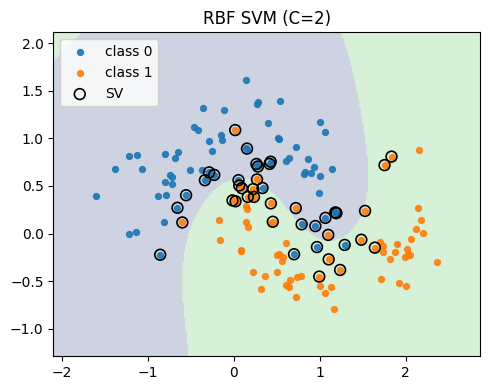

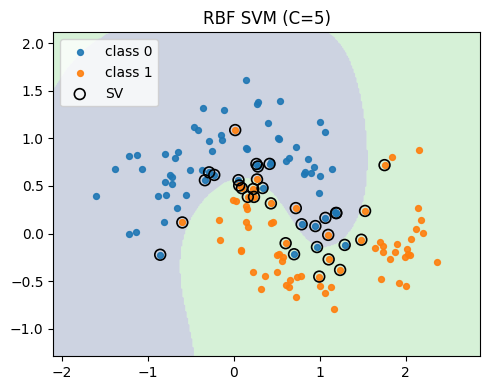

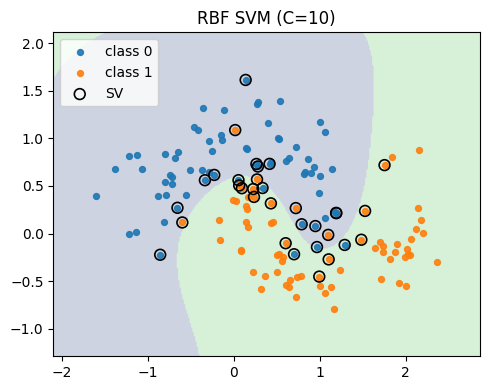

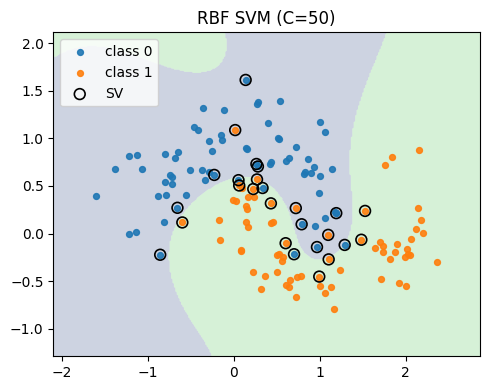

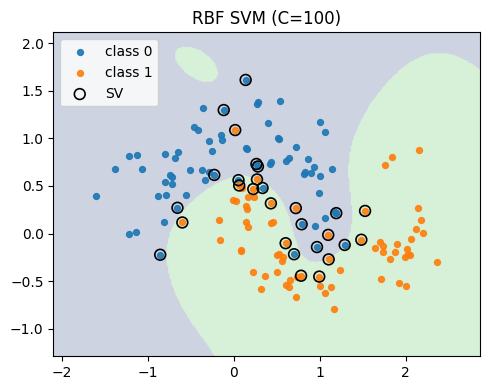

In [6]:
Cs = [0.05, 0.1, 1, 2, 5, 10, 50, 100]

def plot_decision_boundary(clf, X, y, title):
    # Mesh
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.25, levels=np.arange(-0.5,2), antialiased=True)
    plt.scatter(X[y==0,0], X[y==0,1], s=18, label="class 0", alpha=0.9)
    plt.scatter(X[y==1,0], X[y==1,1], s=18, label="class 1", alpha=0.9)
    # Support vectors
    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], s=60, facecolors='none', edgecolors='k', linewidths=1.2, label='SV')
    plt.title(title)
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

rbf_models = {}
for C in Cs:
    clf = SVC(kernel="rbf", C=C, gamma="scale", random_state=42)
    clf.fit(X_train, y_train)
    rbf_models[C] = clf
    plot_decision_boundary(clf, X_train, y_train, f"RBF SVM (C={C})")

In an SVM, $C$ controls the strength of regularization. A small $C$ imposes stronger regularization, meaning a wider margin and more training errors. Thus, the resulting decision boundary is smoother and may underfit.

A large $C$ weakens regularization, pushing the model to classify training points correctly with few margin violations; the boundary becomes more complex (often wiggly as seen here), which can reduce bias but increase variance and the risk of overfitting.

In [7]:
# Defining kernels
kernels = [
    ("linear", {"kernel":"linear", "C":1.0}),
    ("poly",   {"kernel":"poly",   "C":1.0, "degree":3, "gamma":"scale", "coef0":0.0}),
    ("rbf",    {"kernel":"rbf",    "C":5.0, "gamma":"scale"}),  # a solid RBF setting
    ("sigmoid",{"kernel":"sigmoid","C":1.0, "gamma":"scale", "coef0":0.0}),
]

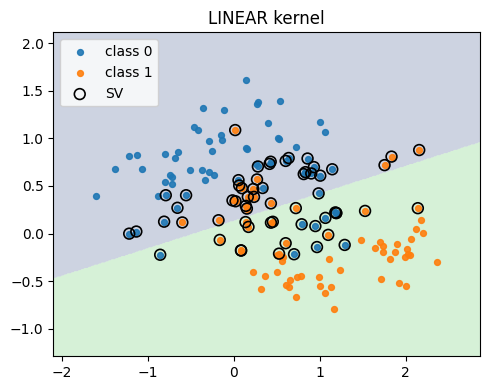

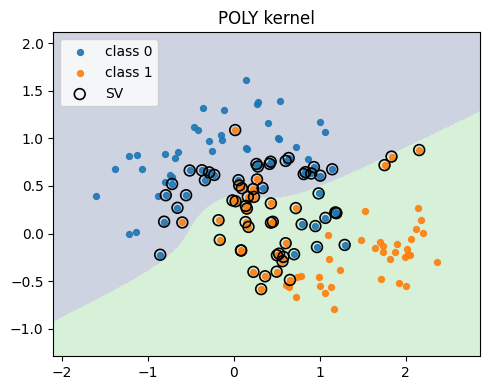

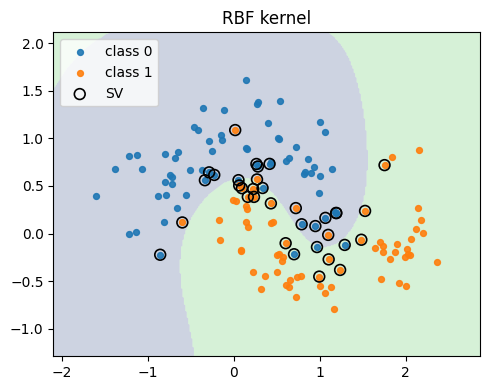

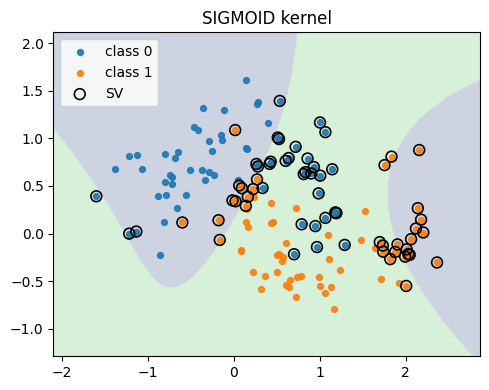

Test accuracies by kernel:
linear : 0.883
poly   : 0.900
rbf    : 0.950
sigmoid: 0.717

Best on this split: RBF (accuracy = 0.950)


In [8]:
acc = {} # accuracy of each kernel

# Training and testing each kernel
for name, params in kernels:
    clf = SVC(**params, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc[name] = accuracy_score(y_test, y_pred)
    plot_decision_boundary(clf, X_train, y_train, f"{name.upper()} kernel")

# Printing accuracy of each kernel
print("Test accuracies by kernel:")
for k,v in acc.items():
    print(f"{k:7s}: {v:.3f}")

# Printing the best kernel (i.e. the one with the highest accuracy)
best_kernel = max(acc, key=acc.get)
print(f"\nBest on this split: {best_kernel.upper()} (accuracy = {acc[best_kernel]:.3f})")


### Problem 2 (Artificial Neural Networks)

**(1) Consider the following two activation functions:**

**The sigmoid function $ f_1(x) = \dfrac{1}{1 + e^{-x}} $ and the hyperbolic tangent $ f_2(x) = \dfrac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $**

**Show that:**
$$ f_1'(x) = f_1(x)\bigl(1 - f_1(x)\bigr) $$
$$ f_2'(x) = 1 - f_2^2(x) $$

**Claim: $ f_1'(x) = f_1(x)\bigl(1 - f_1(x)\bigr)$**

$$
    f_1(x)
    \Rightarrow f_1'(x)
    = -1 \cdot \frac{1}{(1 + e^{-x})^2} \cdot -e^{-x}
    = \frac{e^{-x}}{(1 + e^{-x})^2}
    = \frac{(1 - 1) + (1 - 1) + e^{-x}}{(1 + e^{-x})^2}
$$

$$
    = f_1(x) \left(\frac{(1 - 1) + e^{-x}}{1 + e^{-x}}\right)
    = f_1(x) \left( 1 - f_1(x) \right)
$$

$
\square
$

**Claim: $ f_2'(x) = 1 - f_2^2(x) $**
$$
    f_2(x)
    \Rightarrow f_2'(x)
    = \frac{(e^x + e^{-x})(e^x -(-e^{-x})) - (e^x -e^{-x}) (e^x - e^{-x})}{(e^x + e^{-x})^2}
    = \frac{(e^x + e^{-x})^2 - (e^x -e^{-x})^2}{(e^x + e^{-x})^2}
    = 1 - \left(\frac{e^x -e^{-x}}{e^x + e^{-x}}\right)^2
    = 1 - f_2^2(x)
$$

$
\square
$

**(2) Learn how to use the MLP (multi-layer perceptron) model in sklearn package by reading corresponding sections from sklearn documentations (https://scikit-learn.org/stable/)**

I read through the documentation

**(3) Design your MLP model and apply the MLP classifier from sklearn package to the digits data set. Find the best number of hidden nodes that achieves the best classification result**

In [9]:
# imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd


In [10]:
# Load & split data
X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [11]:
# Pipeline: scale -> MLP (single hidden layer)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(32,),      # placeholder; tuned via grid
        activation="relu",
        solver="adam",
        alpha=1e-4,                    # L2
        learning_rate_init=1e-3,
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=42
    ))
])

In [12]:
# Search space (single hidden layer)

candidates = [8, 16, 32, 64, 128, 192, 256, 320]
param_grid = {"mlp__hidden_layer_sizes": [(h,) for h in candidates]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    refit=True,      # refit on full training set using the best params
)

gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'mlp__hidden_layer_sizes': [(8,), (16,), ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [13]:
# Report best size and score
best_size = gs.best_params_["mlp__hidden_layer_sizes"][0]
best_cv   = gs.best_score_

print(f"Optimal hidden nodes (argmax CV): {best_size}")
print(f"Best CV accuracy: {best_cv:.4f}")

Optimal hidden nodes (argmax CV): 256
Best CV accuracy: 0.9586


In [14]:
# Tie-break toward smaller networks within a tolerance
results = pd.DataFrame(gs.cv_results_)
results["hidden"] = results["param_mlp__hidden_layer_sizes"].apply(lambda t: t[0])
# Find max CV score, then pick smallest hidden size within tolerance
tol = 1e-4
max_cv = results["mean_test_score"].max()
candidates_within_tol = results.loc[
    np.isclose(results["mean_test_score"], max_cv, atol=tol), "hidden"
]
best_size_min = int(candidates_within_tol.min())

if best_size_min != best_size:
    print(f"Tie detected within ±{tol}; choosing smaller model: {best_size_min} nodes")
    best_size = best_size_min

print(f"Selected optimal hidden nodes: {best_size}")

Selected optimal hidden nodes: 256


In [15]:
# Test accuracy of the selected model (already refit by GridSearchCV)
test_acc = gs.best_estimator_.score(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9815


In [16]:
# Leaderboard
leaderboard = results[["hidden", "mean_test_score", "std_test_score"]].sort_values(
    ["mean_test_score", "hidden"], ascending=[False, True]
)
print("\nTop candidates:\n", leaderboard.head(5).to_string(index=False))


Top candidates:
  hidden  mean_test_score  std_test_score
    256         0.958638        0.019233
    320         0.957054        0.016155
     64         0.950667        0.018469
    192         0.949111        0.017775
    128         0.948318        0.019875


The cross-validated results indicate that a single hidden layer with 256 units performs best (mean accuracy ≈ 0.9586 ± 0.0192), narrowly edging out 320 units, which suggests that adding more capacity beyond 256 does not yield further gains. Accuracy generally improves as we scale from 64 → 128 → 192 → 256 hidden nodes, then plateaus or slightly dips at 320, implying diminishing returns at larger sizes. The standard deviations across candidates (~0.016–0.020) are similar, so the ranking isn’t driven by fold-to-fold noise. Given both performance and efficiency, 256 hidden units is a sensible optimal choice within this search; if desired, one could probe nearby sizes (e.g., 224, 288) or repeat with multiple random seeds to confirm robustness.